<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar datos
df_lugares = pd.read_csv('./data/lugares.csv')
df_lugares = df_lugares.set_index('Ciudad')
df_lugares.head()

: 

Como primer paso, se importan las librerías principales para el desarrollo de este taller como pandas y PCA entre otras, luego se lee el archivo de soporte llamado "lugares.csv" y se guardan los datos en un dataframe. Finalmente, como se están evaluando ciudades diferentes, se definió la columna Ciudad como el índice del dataframe.

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

#### 2.1. Reconocimiento de los datos

Para familiarizarse con la información suministrada, en primer lugar se utiliza la función `shape`con el fin de obtener las dimensiones de la base de datos. Al ejecutar este comando se observa que la base de datos cuenta con 329 observaciones y 10 variables.

In [ ]:
df_lugares.shape

Por otra parte, se usa la función `head()` para observar las primeras observaciones y familiarizarse con la información. De aquí se puede concluir que la primera variable es cualitativa y el resto de las variables son de tipo cuantitativo. Así mismo, se observa que cada una de las filas de esta base de datos corresponde a una ciudad. Para las variables numéricas, se buscó documentación sobre esta base de datos para entender si correspondían a una puntuación o una escala común, pero lo encontrado muestra que son indicadores compuestos.

In [ ]:
df_lugares.head()

Adicionalmente, se trató de identificar la presencia de valores faltantes. A continuación se muestra que no los hay, a menos que estos valores tengan algún código especial (por ejemplo un código numérico)

In [ ]:
df_lugares.isnull().mean()*100

#### 2.2. Estadísticas descriptivas

Para encontrar los estadísticos descriptivos, se usó la función `describe`. Algunas conclusiones que se pueden extraer de aquí son:

- No hay variables con datos faltantes, pues todas cuentan con 329 observaciones.
- En tres casos el valor de la mediana es similar al valor de la media: Clima y terreno, Educación y Economía. Esto puede sugerir distribuciones simétricas para estas variables.
- En la mayor parte de los casos la media tiende a estar por encima de la mediana, lo que sugiere que la distribución tiene asimetrías hacia la derecha.
- La variable Artes cuenta con una dispersión demasiado elevada. Esto se puede ver ya que su desviación estándar es mucho más alta que su promedio. Además el valor máximo está muy por encima del promedio lo que sugiere que dicha dispersión se debe a valores atípicos muy altos.
- Ninguna variable cuenta con valores negativos y esto se puede observar con los valores mínimos.

Se procede a calcular las principales medidas de tendencia central de los datos:


,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


Se grafican boxplots para tener una mejor visualización de la dispersión de las variables


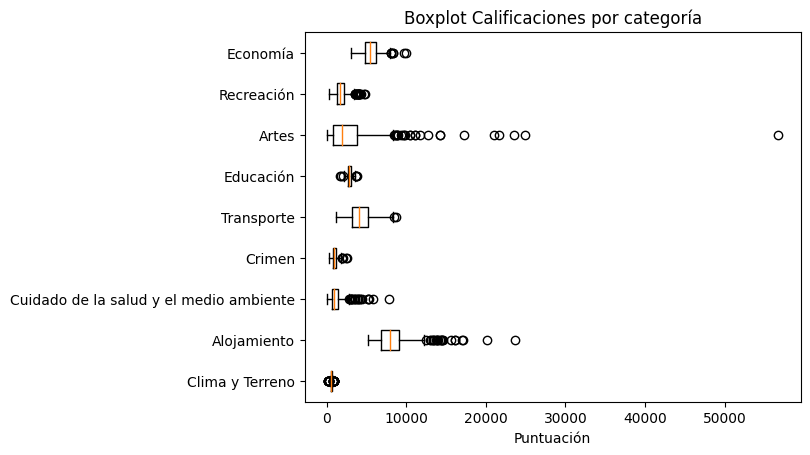

También se grafica un mapa de calor de correlaciones entre las variables


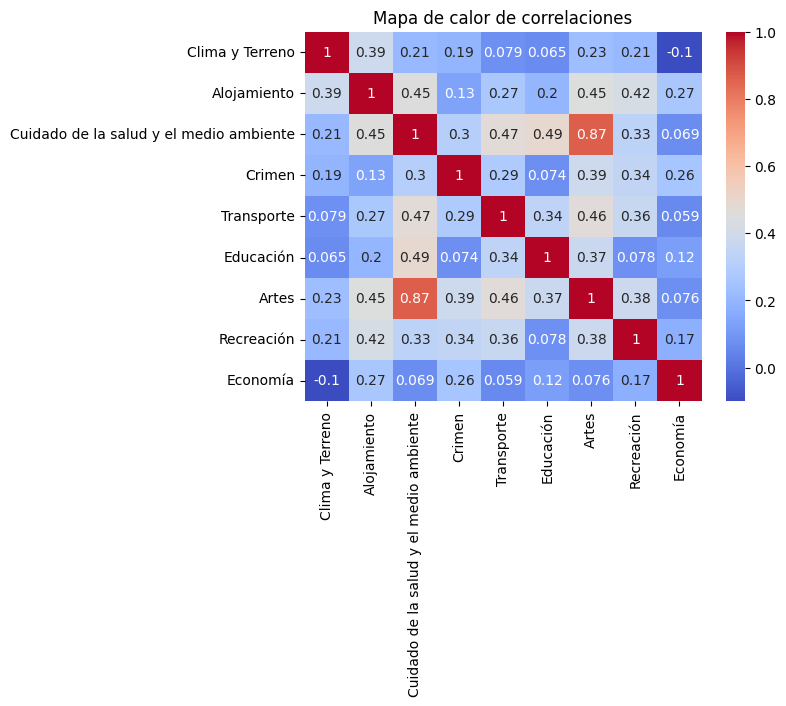

Finalmente, se grafica un pairplot para observar la relación entre variables


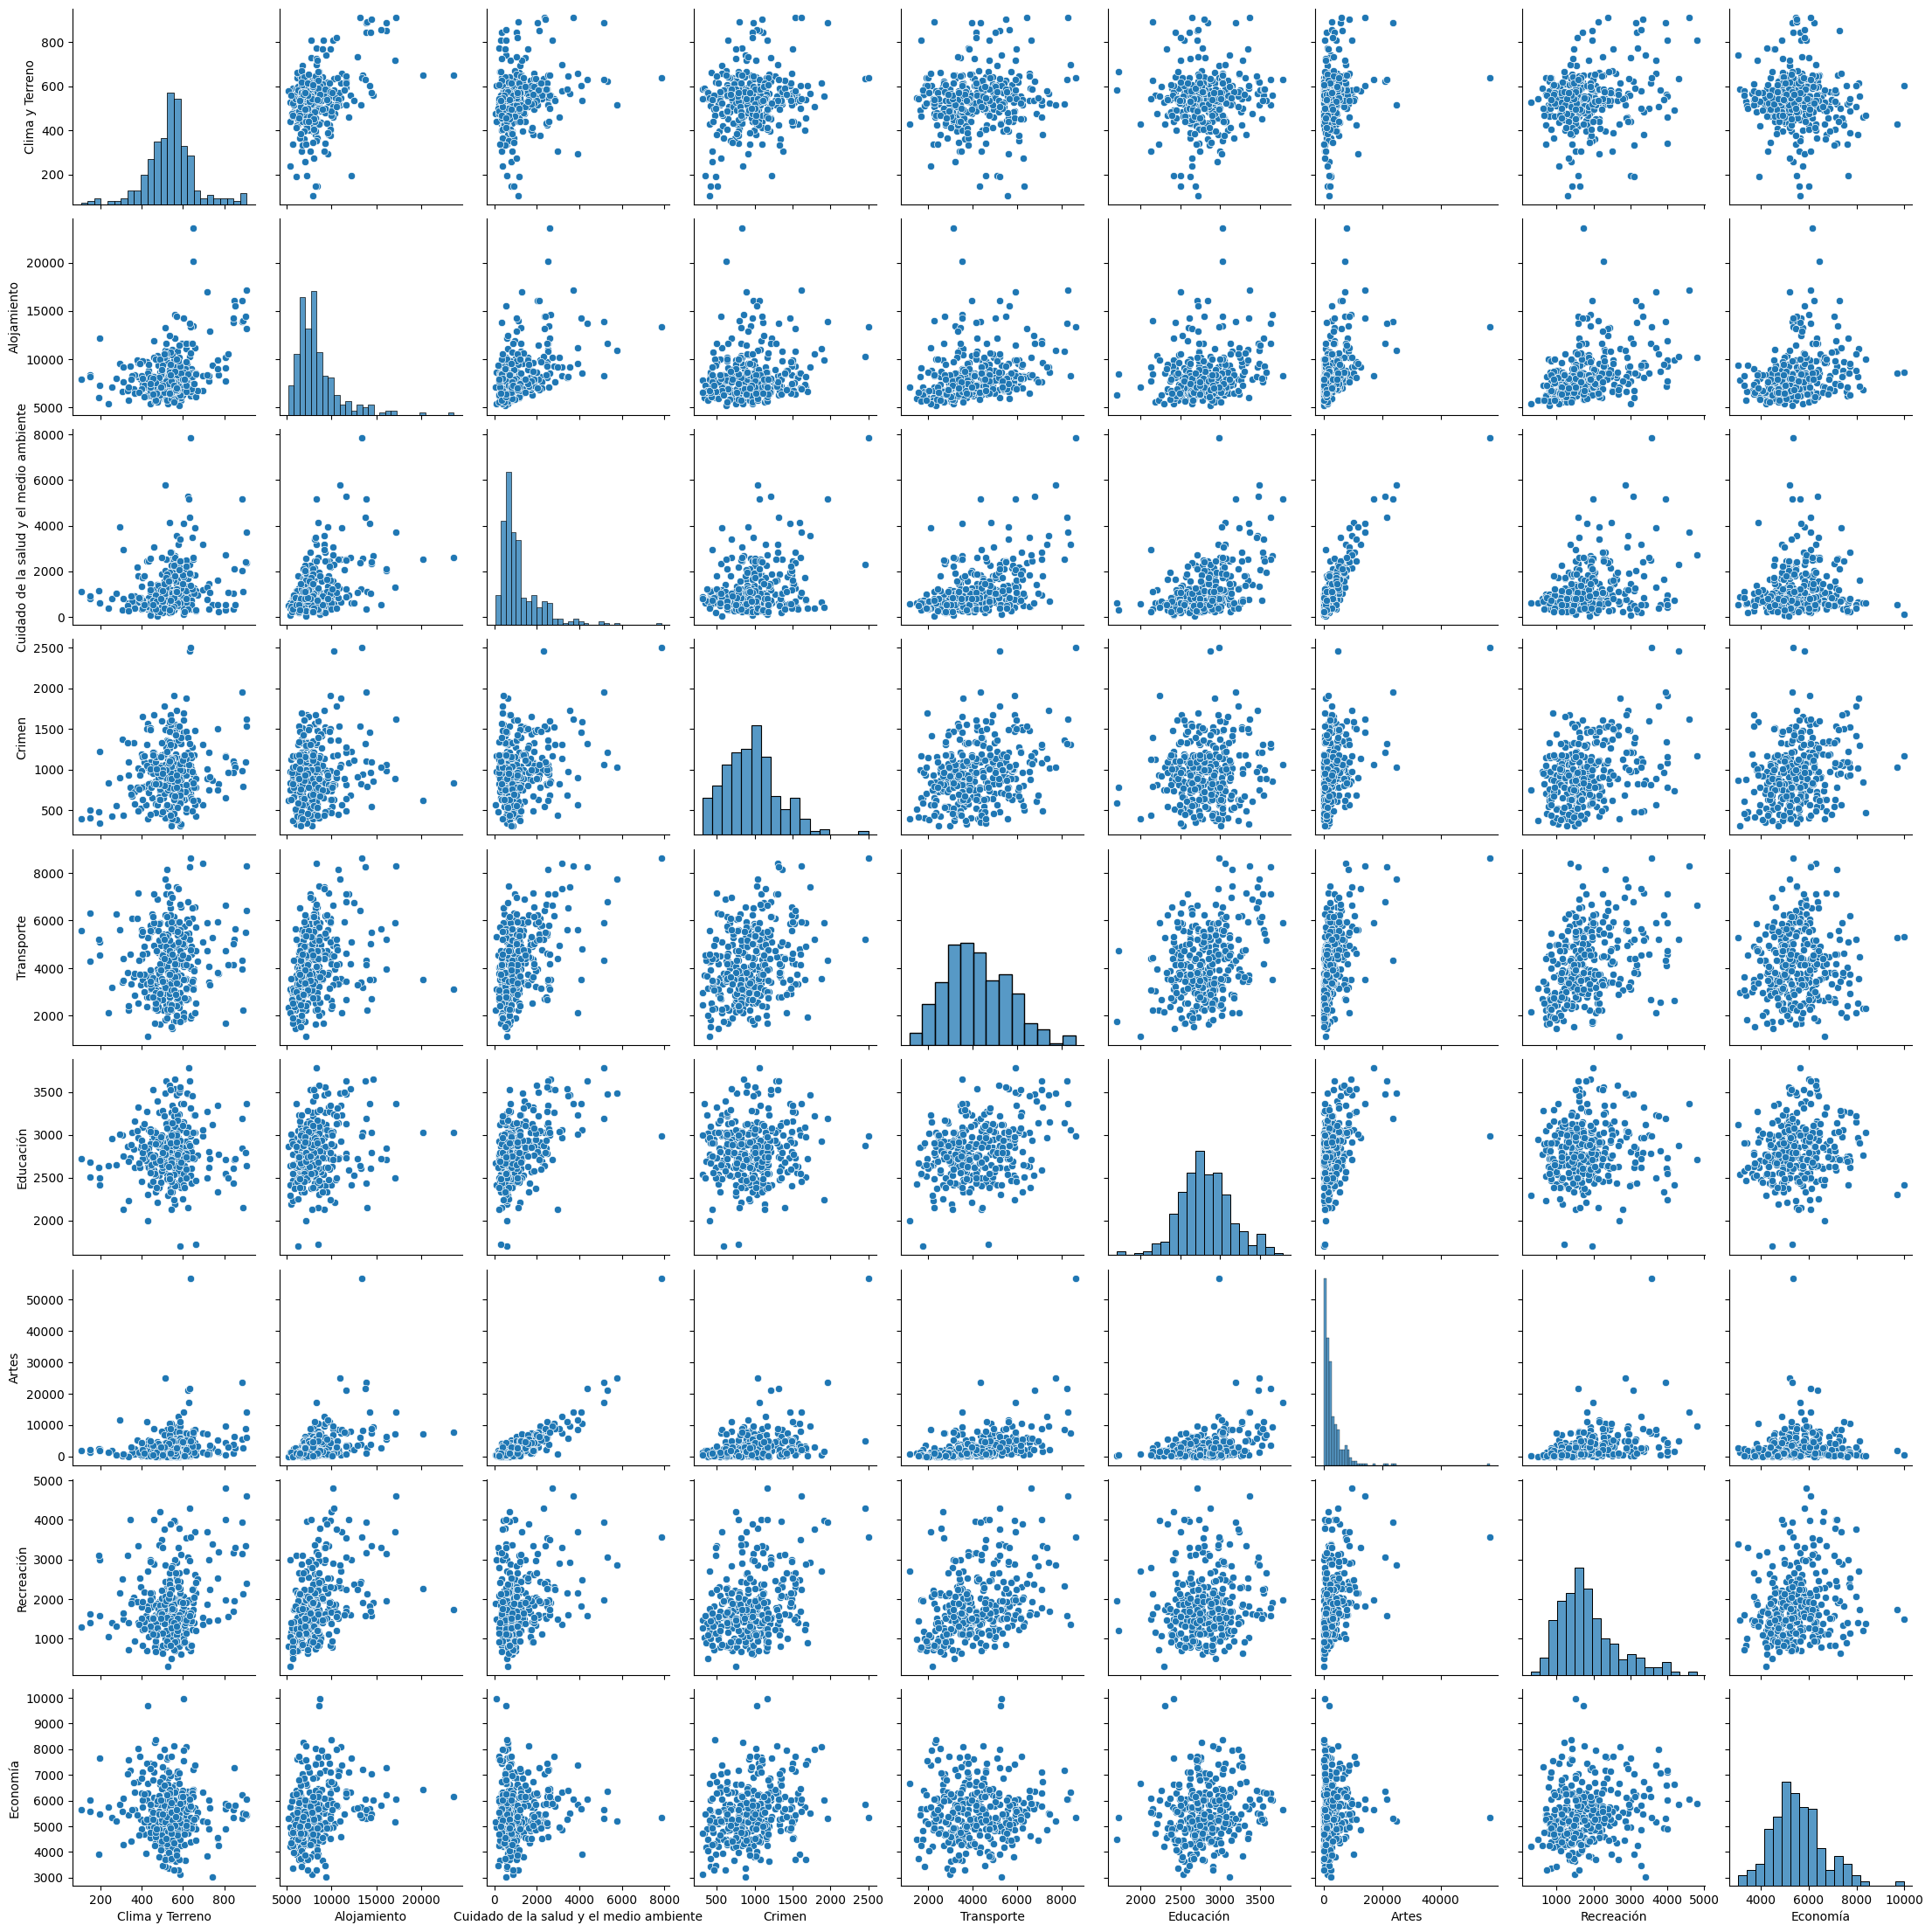

In [ ]:
# Análisis descriptivo de los datos
stats_lugares = df_lugares.describe().T
print('Se procede a calcular las principales medidas de tendencia central de los datos:')
display(stats_lugares)


Como se sugería en el análisis de la media y la mediana, hay tres variables con distribución simétrica, en forma de campana. Estas son Clima y terreno, Educación y Economía. El resto de las variables cuenta con distribuciones asimétricas hacia la derecha, especialmente en la variable Artes. En este caso, resulta viable graficar las combianciones de diagramas de dispersión ya que solo se cuentan con 9 variables, por lo tanto, serían solo 36 gráficos diferentes. Por otra parte, la matriz de correlaciones muestra que en general no hay correlaciones fuertes entre las variables siendo la más fuete la de la variable de Cuidado de salud y medio ambiente con Artes, mientras que el resto de las correlaciones son todas positivas (excepto economía con clima y terreno) y con valores por debajo de 0.5.

In [ ]:
# Boxplot para las categorías de puntuación
print('Se grafican boxplots para tener una mejor visualización de la dispersión de las variables')
plt.boxplot(df_lugares, vert=False, labels=df_lugares.columns)
plt.title('Boxplot Calificaciones por categoría')
plt.xlabel('Puntuación')
plt.show()

# Mapa de calor para la correlación
print('También se grafica un mapa de calor de correlaciones entre las variables')
sns.heatmap(df_lugares.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# Graficar pairplot
print('Finalmente, se grafica un pairplot para observar la relación entre variables')
sns.pairplot(df_lugares)
plt.show()

### Importancia de Calcular estadísticas descriptivas antes de un PCA

Comprensión de los datos: Antes de realizar cualquier tipo de análisis, es crucial comprender la naturaleza de los datos con los que se está trabajando. Las estadísticas descriptivas brindan información sobre la distribución, la dispersión y las características generales de las variables en un conjunto de datos. Esto ayuda a identificar posibles anomalías, patrones inusuales o valores atípicos que podrían afectar la interpretación y el resultado del PCA.

Identificación de valores atípicos: Los valores atípicos pueden tener un impacto significativo en el resultado del PCA al afectar las medidas de distancia y varianza. Al construir estadísticas descriptivas, se pueden identificar valores atípicos y decidir cómo manejarlos adecuadamente antes de realizar PCA.

Selección de variables: Las estadísticas descriptivas ayudan a identificar las variables que tienen una varianza baja o cercana a cero. Estas variables podrían no contribuir significativamente a la variabilidad total de los datos y, por lo tanto, podrían no ser útiles para el análisis de PCA.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

Para comenzar el procedimiento, antes de realizar el análisis de componente principales se debe realizar un proceso de estandarización. En este caso la estandarización consiste en restar a cada variable su media y dividir el resultado entre el promedio.

In [ ]:
mu = df_lugares.mean()
sigma = df_lugares.std()
Z = (df_lugares - mu)/sigma
Z.head()

Con el fin de verificar que el proceso de estandarización fue adecuado se construyen las estadísticas descriptivas para la matriz Z, en efecto, el valor de la media da igual a 0 y la desviación estándar da igual a 1 para todas las variables.

In [ ]:
Z.describe()

A partir de la matriz Z se calcula la matriz de varianzas y covarianzas la cual debido al proceso de estandarización equivale a la matriz de correlaciones.

In [ ]:
S = Z.cov()
S

Con la matriz S se utilizan las funciones de álgebra lineal de numpy para construir los valores propios y los vectores propios correspondientes, se muestran los resultados para los valores propios.

In [ ]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

Para verificar que los valores propios obtenidos son correctos se mostratrá que es posible recuperar la matriz S a partir de ellos. En primer lugar se calcula una matriz diagonal con estos valores propios.

In [ ]:
eig_val_diag = np.diag(eig_val)
eig_val_diag

A continuación, se multiplica la matriz de vectores propios por la matriz diagonal recién calculada y por la matriz de vectores propios transpuesta. El resultado es equivalente a la matriz de varianzas y covarianzas S.

In [ ]:
eig_vec.dot(eig_val_diag).dot(eig_vec.T)

Una vez comprobado que el cálculo de los valores propios es correcto se procede a calcular la proporción de la varianza explicada por cada componente. En este caso, el primer componente explica el 37.9% de la varianza, el segundo el 13.5%, el tercero el 12.7% y el cuarto el 10.23%. Entre estos cuatro primeros componentes se suma el 74% de la varianza total, lo cual se encuentra dentro del criterio del 70 al 90% por lo cual se eligen estos cuatro componentes para continuar con la construcción.

In [ ]:
# Proporción de la varianza explicada
eig_val/sum(eig_val)

Ya que el primer componente se encuentra en la posición 0 se utiliza esta información para extraer los loadings a través de los vectores propios correspondientes y se calcula el resultado del primer componente multiplicando estos pesos por los valores de la matriz Z. Este mismo procedimiento se implementa para los 3 componentes restantes.

In [ ]:
#Loadings
eig_vec=eig_vec.T
eig_vec[[0]]

In [ ]:
f1=Z.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.sort_values(by='CP1', ascending=False).head()

In [ ]:
#Segundo componente
f2=Z.dot(eig_vec[[1]].T) #calculamos f2
f2.columns = ['CP2'] #nombramos la columna del segundo componente como CP2
f2.sort_values(by='CP2', ascending=False).head()

In [ ]:
#Tercer componente
f3=Z.dot(eig_vec[[2]].T) #calculamos f3
f3.columns = ['CP3'] #nombramos la columna del tercer componente como CP3
f3.sort_values(by='CP3', ascending=False).head()

In [ ]:
#Cuarto componente
f4=Z.dot(eig_vec[[3]].T) #calculamos f4
f4.columns = ['CP4'] #nombramos la columna del cuarto componente como CP4
f4.sort_values(by='CP4', ascending=False).head()

### Criterio de Selección del número de componentes principales

Como se mencionó anteriormente se decidió elegir los 4 primeros componentes debiado a que entre ellos se supera el 70% de la varianza total explicada. Si se quisiera dar argumentos adicionales se puede recurrir al criterio de Kaiser. En este caso, los tres primeros componentes presentaron valores por encima de 1 pero sería sensato también incluir el cuarto ya que presenta un valor cercano a 1 (0.9) y además su inclusión permite que se cruce el umbral del 70% de la varianza explicada.

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).